In [1]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from scipy.stats import norm

In [2]:
#Reading csv file
df = pd.read_csv('Global Superstore.csv')

In [3]:
#Viewing the first 2 rows
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31/07/12,31/07/12,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05/02/13,07/02/13,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical


## Data Cleaning and Pre-processing

In [4]:
#Checking for null values
df.isnull().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [5]:
#Dropping 'Postal Code' column as it contains a lot of Null values
df = df.drop(['Postal Code'], axis = 1)

In [6]:
#Checking number of unique values in each column
df.nunique()

Row ID            51290
Order ID          25035
Order Date         1430
Ship Date          1464
Ship Mode             4
Customer ID        1590
Customer Name       795
Segment               3
City               3636
State              1094
Country             147
Market                7
Region               13
Product ID        10292
Category              3
Sub-Category         17
Product Name       3788
Sales             22995
Quantity             14
Discount             27
Profit            24575
Shipping Cost     10037
Order Priority        4
dtype: int64

In [7]:
#Dropping 'Row ID', 'Order ID' and 'Product ID' as the columnn are not significant for our analysis

df = df.drop(['Row ID', 'Order ID', 'Product ID'], axis = 1)

In [8]:
#To get all columns of the dataframe
#We can also check if we want to rename any column. Here, all the column name looks good
df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'City', 'State', 'Country', 'Market', 'Region', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [9]:
#To check data types of all the variables
df.dtypes

Order Date         object
Ship Date          object
Ship Mode          object
Customer ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Market             object
Region             object
Category           object
Sub-Category       object
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
Shipping Cost     float64
Order Priority     object
dtype: object

In [10]:
#Converting Order Date column from object to datetime 
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [11]:
#Converting Ship Date column from object to datetime
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [12]:
#Checking data types again
df.dtypes

Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Ship Mode                 object
Customer ID               object
Customer Name             object
Segment                   object
City                      object
State                     object
Country                   object
Market                    object
Region                    object
Category                  object
Sub-Category              object
Product Name              object
Sales                    float64
Quantity                   int64
Discount                 float64
Profit                   float64
Shipping Cost            float64
Order Priority            object
dtype: object

In [13]:
#Data Dimension
df.shape     #Rows and columns

(51290, 20)

In [14]:
#Describing the numerical attributes of the data set
#describe() function gives us the mean, std, min, max, etc for all the attributes of the data

df.describe()

,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.610982,26.375915
std,487.565361,2.278766,0.212280,174.340972,57.296804
min,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000
50%,85.053000,3.000000,0.000000,9.240000,7.790000
75%,251.053200,5.000000,0.200000,36.810000,24.450000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000


In [15]:
#Checking range of Quantity
#You can check range of different columns to understand the distribution of the data

QuantityRange = max(df.Quantity) - min(df.Quantity)
print('Quantity Range : ' + str(QuantityRange))

Quantity Range : 13


In [16]:
#Shows the unique values in particular column
df.Market.unique()

array(['US', 'APAC', 'EU', 'Africa', 'EMEA', 'LATAM', 'Canada'],
      dtype=object)

## Analyzing Data by Year 

In [17]:
#Creating a new column 'Year' by extracting Year data from the 'Order Date' column
df['Year'] = pd.DatetimeIndex(df['Order Date']).year

In [18]:
#Count of orders per Year
#As_Index is used to set axis as default values instead of Year column

A = df.groupby('Year', as_index = False)['Sales'].count()
A

,Year,Sales
0,2011,8998
1,2012,10962
2,2013,13799
3,2014,17531


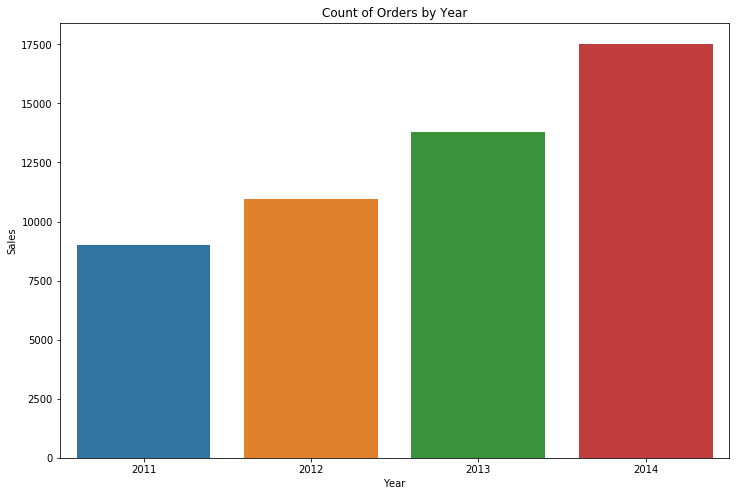

In [19]:
#Line Plot - To Plot count of orders based on Years

plt.figure(figsize = (12,8))
sns.barplot("Year", "Sales", data=A)
plt.title('Count of Orders by Year')
plt.show()

#We can see that there's an increase in count of orders every year.

In [20]:
#Sum of sales and Profit per Year
#We can clearly see an increase in the sum of sales and profit amount

B = df.groupby('Year', as_index = False)['Sales', 'Profit'].sum()
B

,Year,Sales,Profit
0,2011,2.259451e+06,248940.81154
1,2012,2.677439e+06,307415.27910
2,2013,3.405746e+06,406935.23018
3,2014,4.299866e+06,504165.97046


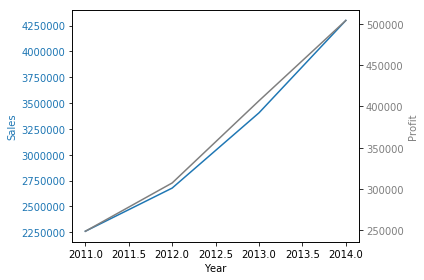

In [21]:
#Multiple Line Plot for Sales and Profit based on Year

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Sales', color=color)
ax1.plot('Year', 'Sales', data = B, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:gray'
ax2.set_ylabel('Profit', color=color)  # we already handled the x-label with ax1
ax2.plot('Year', 'Profit', data = B, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

#The sum of sales and profit are increasing with every year.

## Ship Mode

In [22]:
C = df.groupby(['Ship Mode'], as_index = False)['Shipping Cost'].mean()
C = C.sort_values('Shipping Cost', ascending = False)
C

,Ship Mode,Shipping Cost
1,Same Day,42.937453
0,First Class,41.053065
2,Second Class,30.469747
3,Standard Class,19.971755


The shipping cost is highest if the user selects same day option for ship mode and lowest if they choose for Standard Class delivery.

## Customer

In [23]:
#We can list our top customers based on their order history

D = df.groupby(['Customer Name'], as_index = False)['Sales', 'Quantity'].sum().sort_values(by = 'Sales', ascending = False)
D.head(10)

,Customer Name,Sales,Quantity
758,Tom Ashbrook,40488.07080,284
731,Tamara Chand,37457.33300,271
313,Greg Tran,35550.95428,310
157,Christopher Conant,35187.07640,287
687,Sean Miller,35170.93296,169
73,Bart Watters,32310.44650,338
558,Natalie Fritzler,31781.25850,325
290,Fred Hopkins,30400.67452,290
347,Jane Waco,30288.45030,298
335,Hunter Lopez,30243.56658,207


#With the help of this, we can know our top customers.
#We can also target the customers for our marketing strategies accordingly.

## Segment

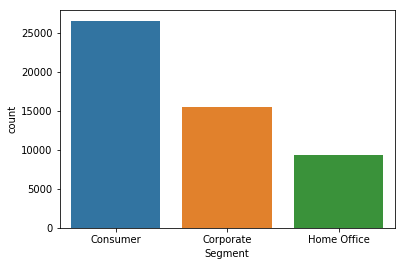

In [24]:
#Count of each segment
sns.countplot("Segment", data = df)
plt.show()

In [25]:
### Which segment gets the highest discount rate?

In [26]:
E = df.groupby(['Segment'], as_index = False)['Discount'].mean().sort_values(by = 'Discount', ascending = False)
E.head(10)

,Segment,Discount
0,Consumer,0.143602
1,Corporate,0.142931
2,Home Office,0.140897


- The average discount received by Consumer is slightly higher than other two segments.
- Home Office segment gets the least discount rate.

In [27]:
### Which segment generates the highest profit?

In [28]:
F = df.groupby(['Segment'], as_index = False)['Profit'].mean().sort_values(by = 'Profit', ascending = False)
F.head(10)

,Segment,Profit
2,Home Office,29.648847
1,Corporate,28.596042
0,Consumer,28.254008


- The average profit obtained from Home Office segment is higher than other two segments.

## Country

In [29]:
## Which are the top 10 Country by Sales?

In [30]:
G = df.groupby(['Country'], as_index = False)['Sales'].sum().sort_values(by = 'Sales', ascending = False)
G.head(10)

,Country,Sales
139,United States,2.297201e+06
6,Australia,9.252359e+05
44,France,8.589311e+05
26,China,7.005620e+05
47,Germany,6.288400e+05
81,Mexico,6.225906e+05
57,India,5.896501e+05
138,United Kingdom,5.285763e+05
58,Indonesia,4.048875e+05
17,Brazil,3.611064e+05


In [31]:
## Which are the top 10 Country by Profit?

In [32]:
H = df.groupby(['Country'], as_index = False)['Profit'].sum().sort_values(by = 'Profit', ascending = False)
H.head(10)

,Country,Profit
139,United States,286397.02170
26,China,150683.08500
57,India,129071.83500
138,United Kingdom,111900.15000
44,France,109029.00300
47,Germany,107322.82050
6,Australia,103907.43300
81,Mexico,102818.09752
119,Spain,54390.12000
38,El Salvador,42023.24320


#Countries like China, India and UK have less sales compared to Australia and France but their profits are much higher than others.

## Market

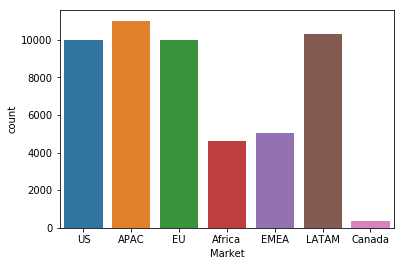

In [33]:
#Count of Orders based on Market

sns.countplot("Market", data = df)
plt.show()

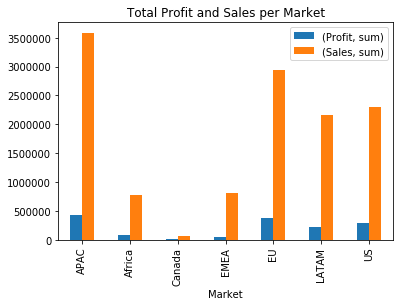

In [34]:
#Profit and Sales for each Market
df.groupby('Market')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Market')
plt.legend(title = '')
plt.show()

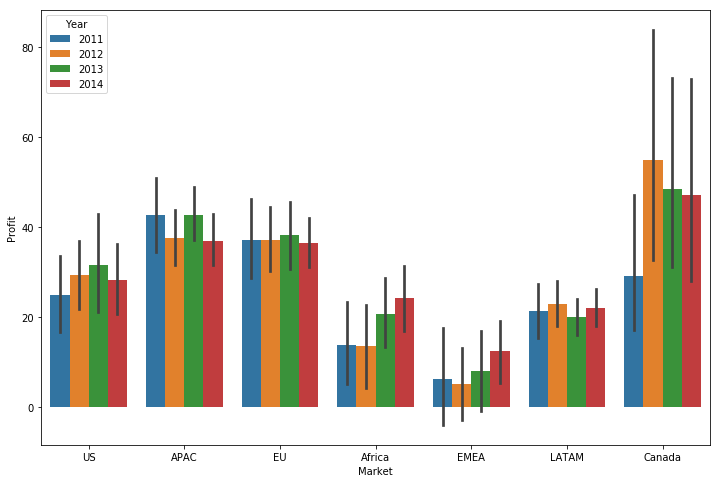

In [35]:
#Barplot showing Market and sum of Profit based on Years

plt.figure(figsize = (12,8))                            
sns.barplot("Market", "Profit", data=df, hue = 'Year')   
plt.show() 

## Category

In [36]:
## Which are the top Category and Sub-Category based on Sales record?

In [37]:
I = df.groupby(['Category', 'Sub-Category'], as_index = False)["Sales"].sum()
I = I.sort_values(["Sales"], ascending = False)
I.head(10)

,Category,Sub-Category,Sales
16,Technology,Phones,1.706824e+06
14,Technology,Copiers,1.509436e+06
1,Furniture,Chairs,1.501682e+06
0,Furniture,Bookcases,1.466572e+06
11,Office Supplies,Storage,1.127086e+06
4,Office Supplies,Appliances,1.011064e+06
15,Technology,Machines,7.790601e+05
3,Furniture,Tables,7.570419e+05
13,Technology,Accessories,7.492370e+05
6,Office Supplies,Binders,4.619115e+05


In [38]:
## Which are the top categories whose shipping cost is the highest?

In [39]:
J = df.groupby(['Category', 'Sub-Category'], as_index = False)["Shipping Cost"].mean()
J = J.sort_values(["Shipping Cost"], ascending = False)
J.head(10)

,Category,Sub-Category,Shipping Cost
3,Furniture,Tables,92.754309
14,Technology,Copiers,71.748309
0,Furniture,Bookcases,64.488689
4,Office Supplies,Appliances,61.709846
16,Technology,Phones,55.079765
15,Technology,Machines,53.254307
1,Furniture,Chairs,47.824651
13,Technology,Accessories,27.158888
11,Office Supplies,Storage,23.828120
2,Furniture,Furnishings,12.853981


In [40]:
## Which are the Sub-Categories with lowest profits

J = df.groupby(['Category', 'Sub-Category'], as_index = False)["Profit"].mean()
J = J.sort_values(["Profit"], ascending = True)
J.head(10)

,Category,Sub-Category,Profit
3,Furniture,Tables,-74.429023
8,Office Supplies,Fasteners,4.762572
9,Office Supplies,Labels,5.759982
12,Office Supplies,Supplies,9.312686
6,Office Supplies,Binders,11.776633
5,Office Supplies,Art,11.868505
7,Office Supplies,Envelopes,12.156516
2,Furniture,Furnishings,14.816223
10,Office Supplies,Paper,16.734789
11,Office Supplies,Storage,21.439314


#Furniture like Tables and Office Supplies like Fasteners, Labels are the categories with lowest profits

## Product Name

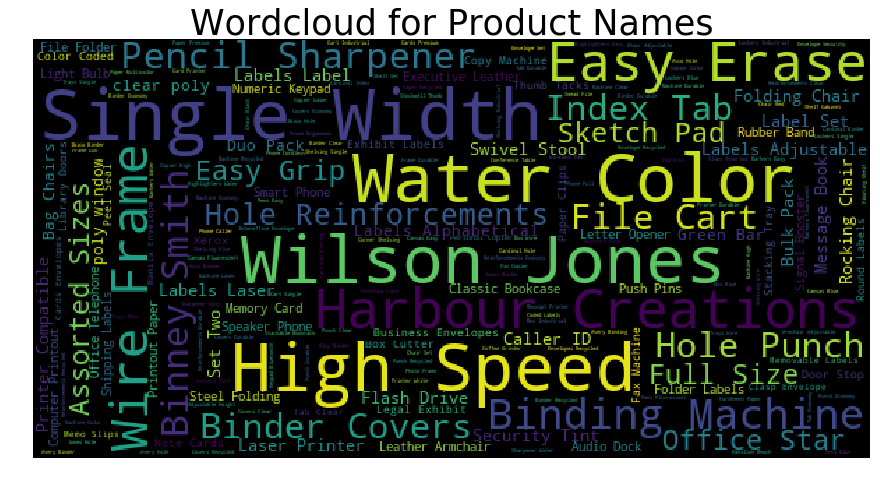

In [41]:
#Word cloud showing Product Name
#To visualize the top products

names = df["Product Name"][~pd.isnull(df["Product Name"])]
wordcloud = WordCloud(max_font_size=50, width=600, height=300).generate(' '.join(names))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.title("Wordcloud for Product Names", fontsize=35)
plt.axis("off")
plt.show()

## Sales

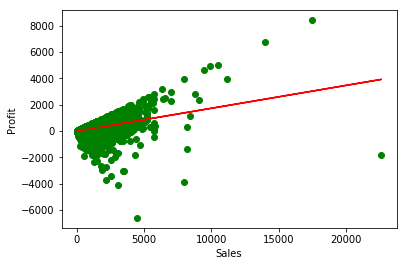

In [42]:
#Scatter plot of Sales and Profit
plt.scatter(df.Sales, df.Profit, color = 'green')
x = df.Sales
y = df.Profit
plt.xlabel('Sales')
plt.ylabel('Profit')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color = 'red')
plt.show()

## Quantity

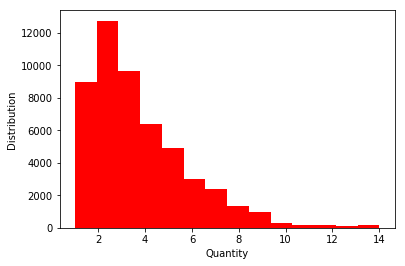

In [43]:
#Histogram showing distribution of Quantity

plt.hist(df.Quantity, 14, color = 'red')                                                           
plt.xlabel('Quantity')                             
plt.ylabel('Distribution')                                        
plt.show()

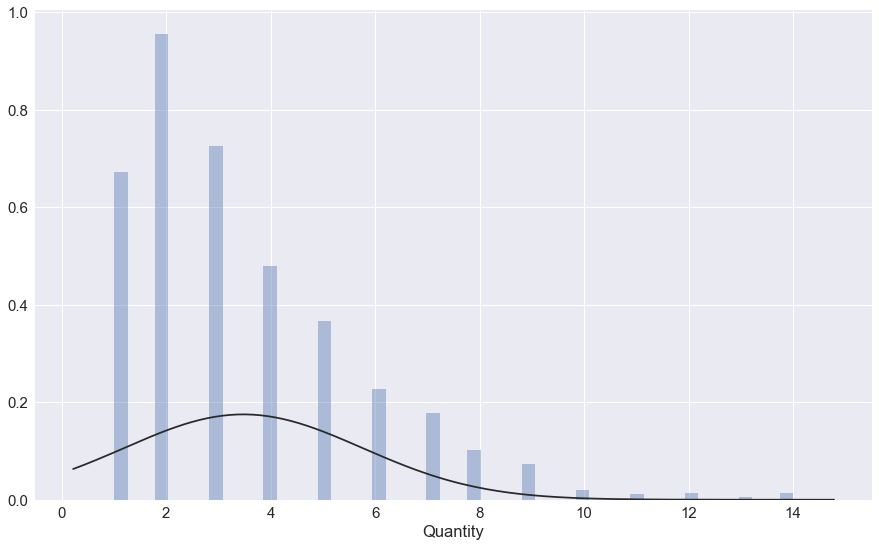

In [44]:
#The graph shows us the Distribution of Quantity (Kernel Density)

sns.set(font_scale=1.5) 
fig, ax = plt.subplots(figsize = (15, 9))
sns.distplot(a = df.Quantity, kde = False, fit = norm)

## Correlation

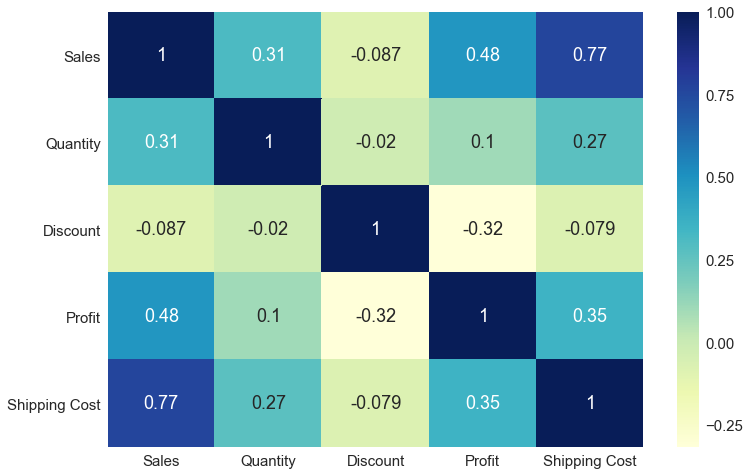

,Sales,Quantity,Discount,Profit,Shipping Cost
Sales,1.000000,0.313577,-0.086722,0.484918,0.768073
Quantity,0.313577,1.000000,-0.019875,0.104365,0.272649
Discount,-0.086722,-0.019875,1.000000,-0.316490,-0.079056
Profit,0.484918,0.104365,-0.316490,1.000000,0.354441
Shipping Cost,0.768073,0.272649,-0.079056,0.354441,1.000000


In [45]:
df2 = df.drop(['Year'], axis = 1)       #Dropping Year column as that data is not significant
plt.figure(figsize = (12,8))
corrplot = sns.heatmap(df2.corr(), cmap="YlGnBu", annot=True)         #Making a heatmap for correlation between variables
plt.show()
df2.corr()

- We can see that Sales is highly correlated with Profit and Shipping Cost
- Sales is also correlated with Quantity variable but the correlation is just around 31%

## Order Priority

In [46]:
#Order Priority based on their average Shipping Cost
K = df.groupby(['Order Priority'], as_index = False)["Shipping Cost"].mean()
K = K.sort_values(["Shipping Cost"], ascending = False)
K

,Order Priority,Shipping Cost
0,Critical,59.721333
1,High,32.871887
2,Low,27.076448
3,Medium,18.442428


The average shipping cost for Critical Orders are the highest whereas Low and Medium Priority orders have the lowest shipping cost